In [2]:
import os
import numpy as np
import pandas as pd
import readdat as rd


In [3]:
# airfoils_resampled.npy の中身を可視化
import matplotlib.pyplot as plt

airfoildata = np.load("airfoils_resampled.npy")
airfoildata.shape
airfoildata[0]

array([[ 1.00000000e+00,  1.60000000e-03],
       [ 9.89948862e-01,  3.77104575e-03],
       [ 9.79897725e-01,  5.94209150e-03],
       [ 9.69846587e-01,  8.11313724e-03],
       [ 9.59795449e-01,  1.02841830e-02],
       [ 9.49743999e-01,  1.24537603e-02],
       [ 9.39680566e-01,  1.45670812e-02],
       [ 9.29617133e-01,  1.66804022e-02],
       [ 9.19553700e-01,  1.87937231e-02],
       [ 9.09490267e-01,  2.09070440e-02],
       [ 8.99425595e-01,  2.30143066e-02],
       [ 8.89340410e-01,  2.50212584e-02],
       [ 8.79255225e-01,  2.70282102e-02],
       [ 8.69170040e-01,  2.90351620e-02],
       [ 8.59084855e-01,  3.10421138e-02],
       [ 8.48999670e-01,  3.30490656e-02],
       [ 8.38914486e-01,  3.50560174e-02],
       [ 8.28829301e-01,  3.70629692e-02],
       [ 8.18744116e-01,  3.90699209e-02],
       [ 8.08658931e-01,  4.10768727e-02],
       [ 7.98569282e-01,  4.30603906e-02],
       [ 7.88452533e-01,  4.49016390e-02],
       [ 7.78335784e-01,  4.67428873e-02],
       [ 7.

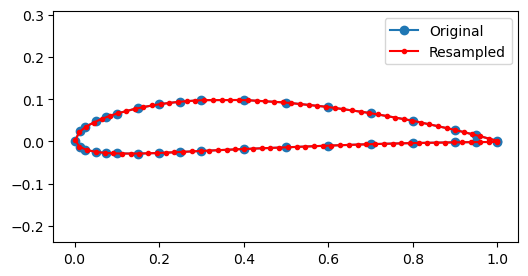

In [23]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "naca4412.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=100)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


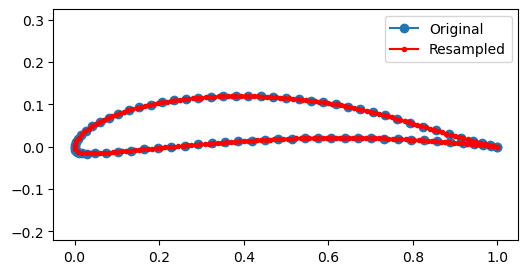

In [24]:
data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


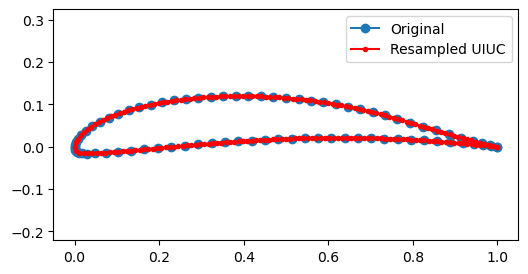

In [25]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)
coords_resampled_uiuc = resmpl.normalize_and_resample_uiuc(coords, n_points=200)


plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled_uiuc[:,0], coords_resampled_uiuc[:,1], 'r.-', label='Resampled UIUC')
plt.axis('equal')
plt.legend()
plt.show()                                  


補間点数は200あれば十分

# Dev VAE


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 200, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 200, 32)   │        352 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 100, 32)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 64)   │     10,304 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 50, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 50, 128)   │     24,704 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 6400)      │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    819,328 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 855,204 (3.26 MB)

 Trainable params: 855,204 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6400)           │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 50, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 100, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 200, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Conv1D)         │ (None, 200, 2)         │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,842 (468.13 KB)

 Trainable params: 119,842 (468.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - kl_loss: 3.6345 - loss: 45.0169 - reconstruction_loss: 41.3824
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 2.4130 - loss: 19.8628 - reconstruction_loss: 17.4498
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 3.2961 - loss: 18.2185 - reconstruction_loss: 14.9223
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 2.9789 - loss: 14.3404 - reconstruction_loss: 11.3615
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 3.3189 - loss: 16.0780 - reconstruction_loss: 12.7591
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 2.8394 - loss: 20.6050 - reconstruction_loss: 17.7656
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - kl_loss: 2.9248 - loss: 12.8962 - reconstruction_loss: 9.9713
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - kl_loss: 3.2332 - loss: 12.6337 - reconstruction_loss: 9.4006
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 2.8232 - los

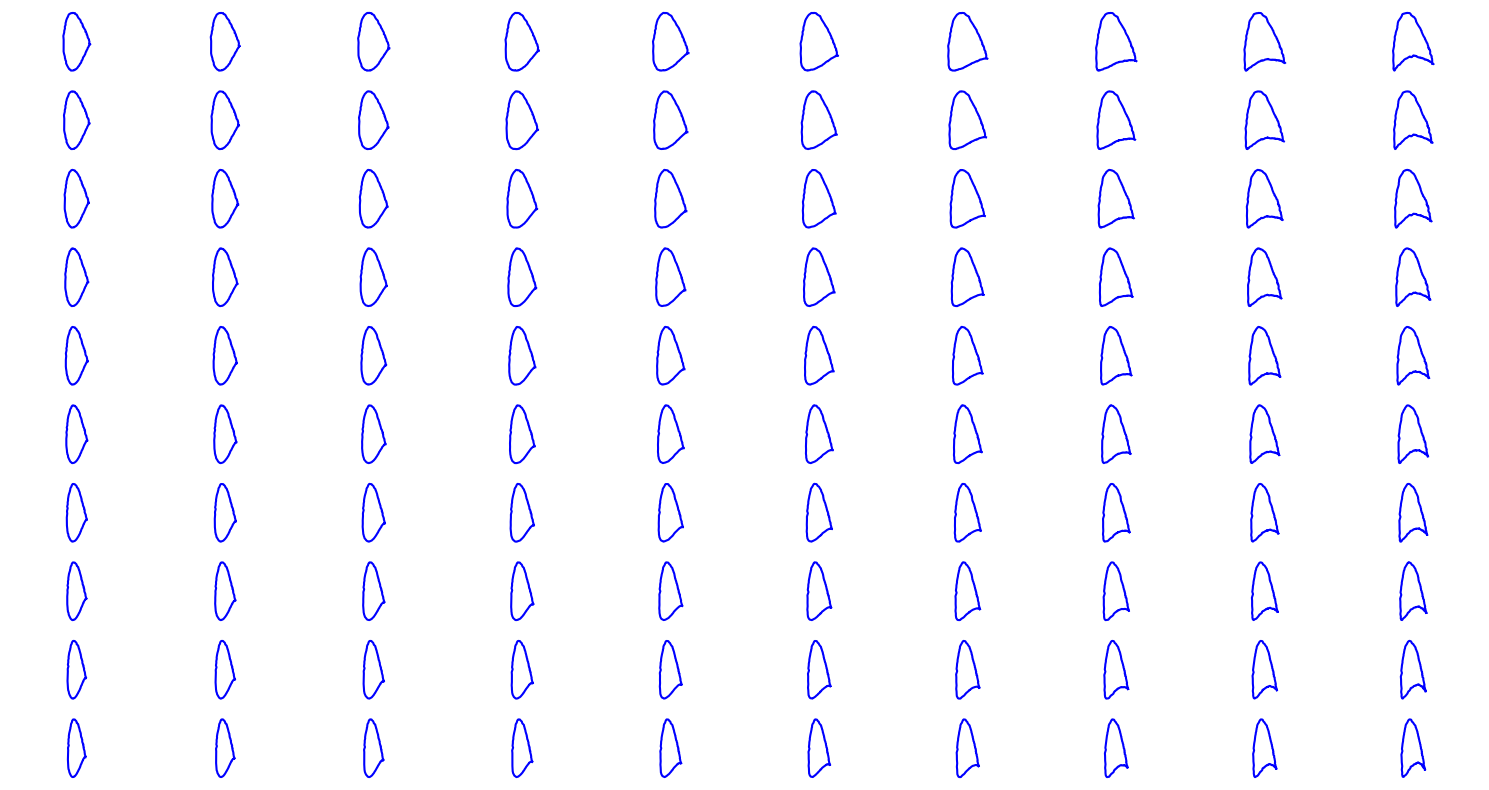

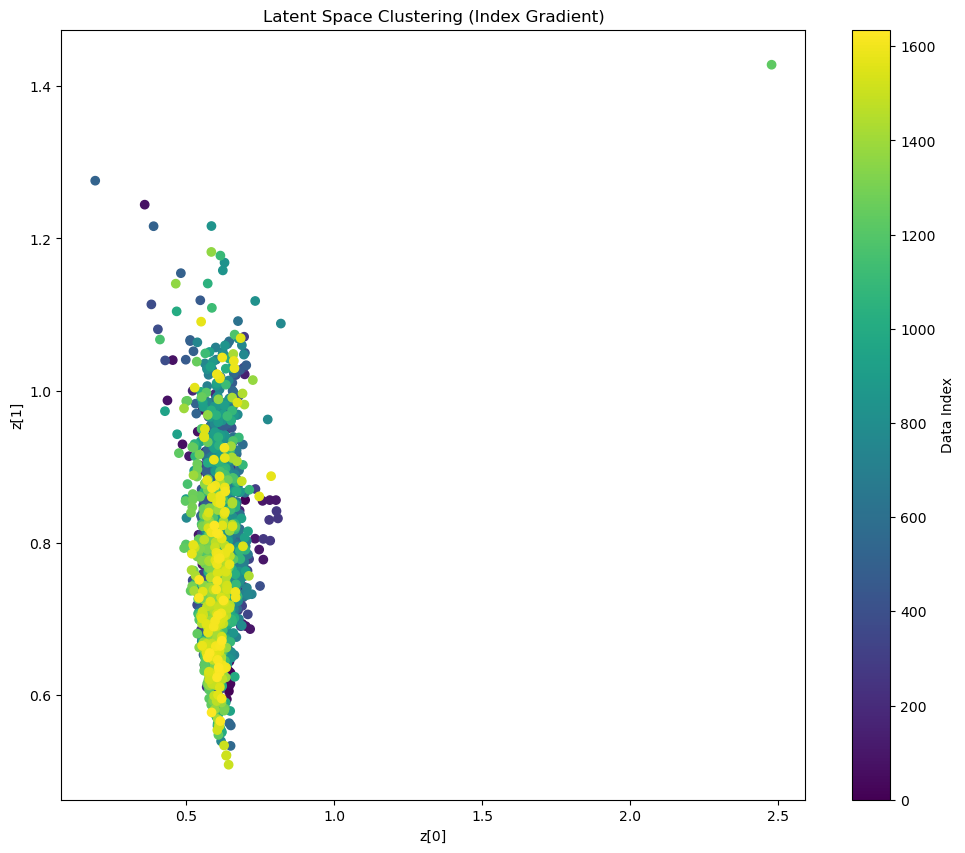

In [4]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers


# -----------------------
# ハイパーパラメータ
# -----------------------
DATA_PATH = "airfoils_resampled.npy"
MODEL_DIR = "vae_models"
BATCH_SIZE = 32
EPOCHS = 30
LATENT_DIM = 2         # 潜在次元（調整する）
N_POINTS = 200
N_CHANNELS = 2         # x,y
LEARNING_RATE = 1e-3


"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z"""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        """
        reparametrization trick（再パラメータ化トリック）
        ガウシアン分布からサンプリングするためのトリック。
        z_meanとz_log_varを使って、zをサンプリングする。
        サンプリング操作を微分可能にし、VAEの学習を可能にしています。
        潜在空間の分布から「z」を生成。
        """
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""
encoder_inputs = keras.Input(shape=(N_POINTS, N_CHANNELS), name="encoder_input")
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(encoder_inputs)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 200 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 100 -> 50
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


"""
## Build the decoder
"""
latent_inputs = keras.Input(shape=(LATENT_DIM,), name="z_sampling")
x = layers.Dense(50 * 128, activation="relu")(latent_inputs)
x = layers.Reshape((50, 128))(x)  # match encoder downsampled length
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 50 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 100 -> 200
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
decoded_outputs = layers.Conv1D(N_CHANNELS, kernel_size=1, padding="same", activation=None, name="decoder_output")(x)
decoder = keras.Model(latent_inputs, decoded_outputs, name="decoder")
decoder.summary()


"""
## Define the VAE as a `Model` with a custom `train_step`
"""

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        """
        1. エンコーダを通してデータを潜在変数に変換
        2. デコーダを通して再構成データを生成
        3. 再構成損失とKL損失（正則化項）を計算
        4. 勾配を計算し、モデルを更新
        z_mean：潜在変数の平均 myu
        z_log_var：潜在変数の対数分散 log(var(z)) log(sigma^2)
        var_z：潜在変数の分散 var(z) sigma^2
        z：潜在変数
     """
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            
            # デコーダを通して再構成データを生成
            reconstruction = self.decoder(z)

            # 再構成損失        
            reconstruction_loss = ops.mean(
                ops.sum(
                    ops.square(data - reconstruction),
                    axis=1  # (batch, 200, 2) → sum over points/channels
                )
            )

            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var)) # KLダイバージェンス
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss # VAEの総損失

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE

- airfoils_resampled.npyを読み込み。airfoilデータは(1640,200,2)のndarray
- yチャネルのスケール正規化（必要なら）
- VAEモデルを作成・コンパイルし、全データで学習
"""

# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# 必要ならyチャンネルのスケール調整
y_std = np.std(airfoil_data[:,:,1])
if y_std > 0:
    airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std

# VAEモデルの作成・コンパイル
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# 学習
vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)

"""
## Display a grid of sampled airfoil
"""

import matplotlib.pyplot as plt

def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_latent_space_airfoil(vae)

"""
## Display how the latent space clusters different airfoil classes
"""


def plot_label_clusters(vae, data):
    # display a 2D plot of the airfoil latent space, colored by data index (gradient)
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    idx = np.arange(len(z_mean))
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=idx, cmap='viridis')
    plt.colorbar(scatter, label='Data Index')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering (Index Gradient)")
    plt.show()

"""
「潜在空間の可視化（クラスタリングプロット）用に、airfoilとラベルを準備」
"""

airfoil_data = np.load("airfoils_resampled.npy")
plot_label_clusters(vae, airfoil_data)


Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - kl_loss: 2.0201 - loss: 4.7711 - reconstruction_loss: 2.7509 
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - kl_loss: 0.0069 - loss: 0.1889 - reconstruction_loss: 0.1820
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - kl_loss: 0.0015 - loss: 0.1351 - reconstruction_loss: 0.1336
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - kl_loss: 0.0010 - loss: 0.1222 - reconstruction_loss: 0.1212    
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - kl_loss: 8.6078e-04 - loss: 0.1174 - reconstruction_loss: 0.1166
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - kl_loss: 7.7388e-04 - loss: 0.1131 - reconstruction_loss: 0.1124
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - kl_loss: 7.0478e-04 - loss: 0.1111 - reconstruction_loss: 0.1104
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - kl_loss: 6.7822e-04 - loss: 0.1114 - reconstruction_loss: 0.1107
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - kl_loss: 5.889

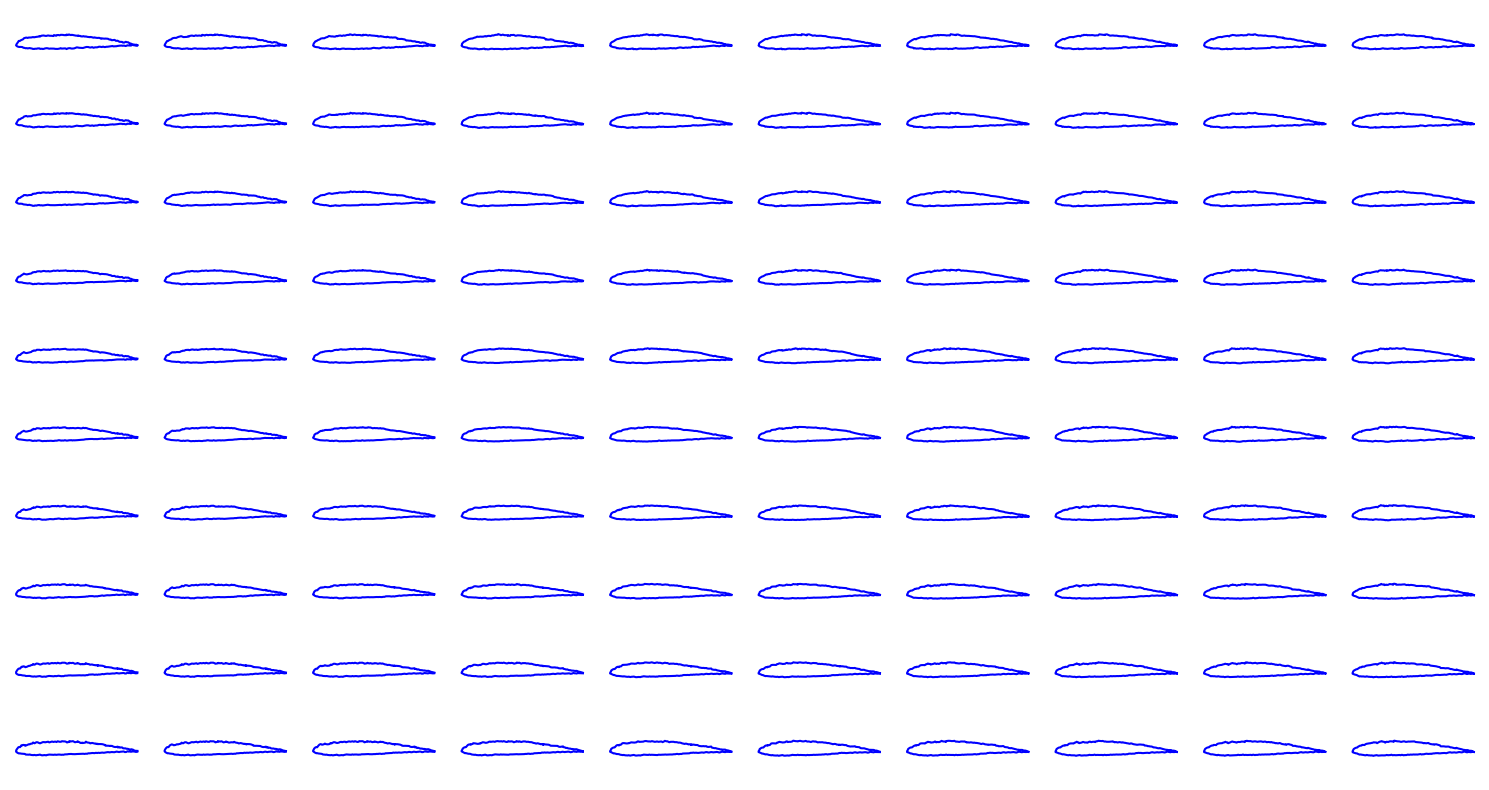

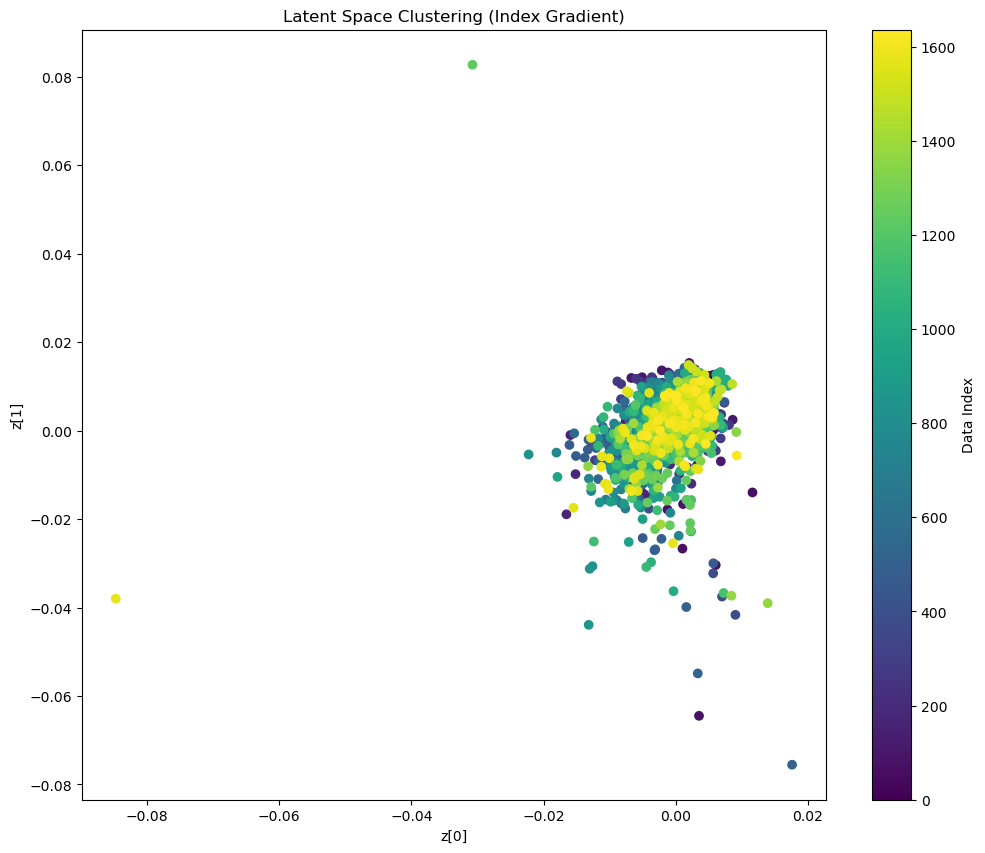

In [5]:
# yの正規化なし

# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# # 必要ならyチャンネルのスケール調整
# y_std = np.std(airfoil_data[:,:,1])
# if y_std > 0:
#     airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std


# 学習
vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)

# grid plot
plot_latent_space_airfoil(vae)

# scatter plot
plot_label_clusters(vae, airfoil_data)

yを分散で割って正規化なしでは翼形状が均質化

"""
yチャンネルのスケール調整（airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std）がある場合、y方向の値のばらつき（標準偏差）が1に揃えられ、xとyのスケールが均等になります。
これにより、VAEの潜在空間で再構成される翼形状は、y方向の形状差が強調され、さまざまな形状が現れます。

一方、スケール調整がない場合は、yの値の範囲が小さいため、VAEは主にx方向の情報で学習し、y方向の違いが埋もれてしまい、潜在空間の分布から再構成される翼形状はほぼ同じ形状（y方向の差が小さい）になります。

まとめ：

スケール調整あり：y方向の形状差が反映され、多様な翼形状が潜在空間に分布
スケール調整なし：y方向の差が小さくなり、潜在空間の翼形状が均質化
この調整は、VAEで形状の多様性を表現したい場合に重要です。
"""

In [ ]:
import ResampleUIUC as resmpl

folder = "UIUC Database"  # UIUCのdatフォルダ
dataset, names = resmpl.process_uiuc_folder(folder, n_points=200)


yの正規化あり  
デコーダ再構築値に標準偏差かけてyのスケール戻し

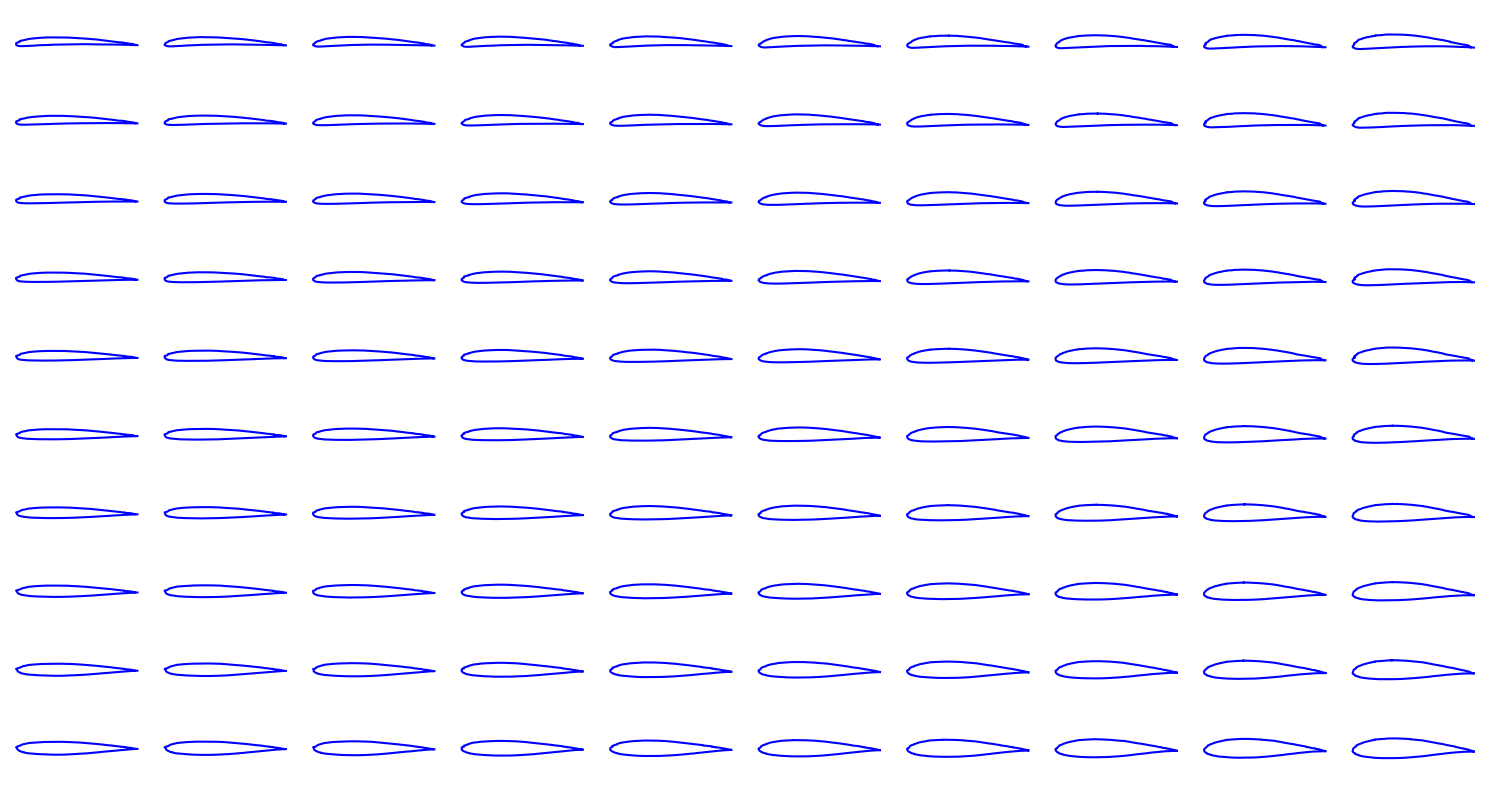

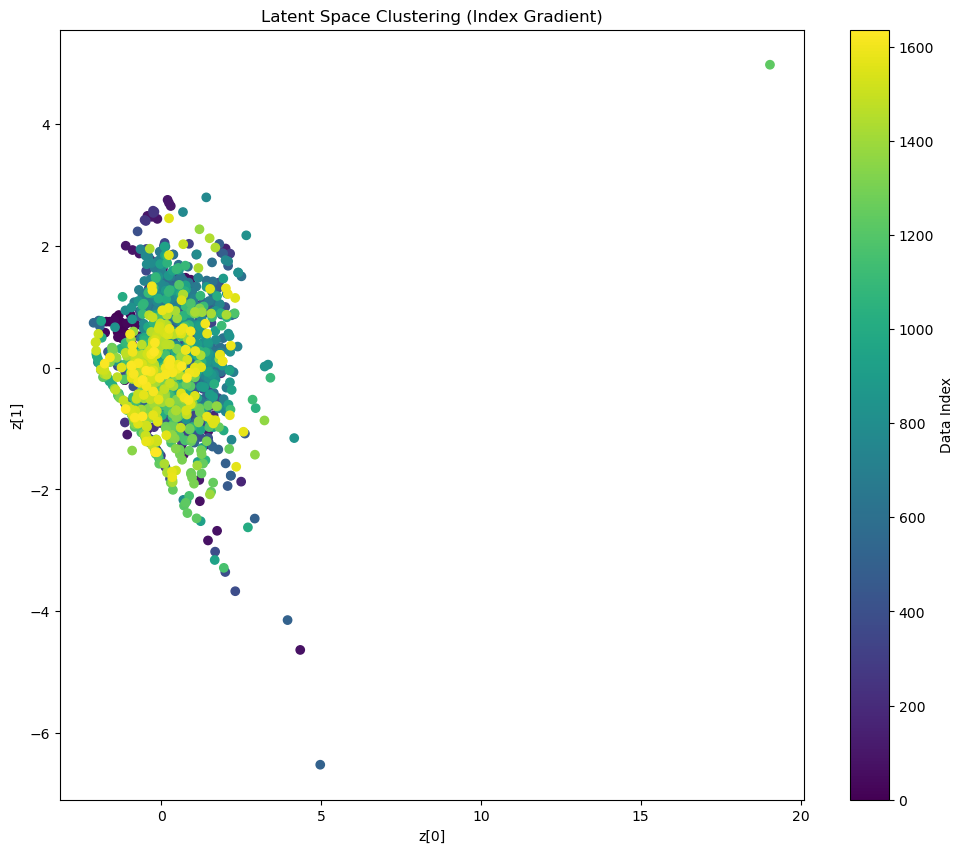

In [17]:
# -----------------------
# ハイパーパラメータ
# -----------------------
DATA_PATH = "airfoils_resampled.npy"
MODEL_DIR = "vae_models"
BATCH_SIZE = 32
EPOCHS = 30
LATENT_DIM = 2         # 潜在次元（調整する）
N_POINTS = 200
N_CHANNELS = 2         # x,y
LEARNING_RATE = 1e-3


# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# 必要ならyチャンネルのスケール調整
# スケール調整なしだとxが主成分となり、yの変動が小さくなるため、yのスケールを調整
y_std = np.std(airfoil_data[:,:,1])
if y_std > 0:
    airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std

# 学習
# vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)


# デコーダ再構築値に標準偏差かけてyのスケール戻し
def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            coords_decoded[:, 1] = coords_decoded[:, 1] * y_std

            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()



def plot_label_clusters(vae, data):
    # display a 2D plot of the airfoil latent space, colored by data index (gradient)
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    idx = np.arange(len(z_mean))
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=idx, cmap='viridis')
    plt.colorbar(scatter, label='Data Index')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering (Index Gradient)")
    plt.show()


# grid plot
plot_latent_space_airfoil(vae)

# scatter plot
plot_label_clusters(vae, airfoil_data)


外れ値除外後　
naca001264.dat

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - kl_loss: 3.0233 - loss: 6.8781 - reconstruction_loss: 3.8548
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - kl_loss: 2.8077 - loss: 7.9718 - reconstruction_loss: 5.1641 
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 3.0382 - loss: 8.9739 - reconstruction_loss: 5.9357
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - kl_loss: 3.0799 - loss: 6.0311 - reconstruction_loss: 2.9512
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - kl_loss: 3.0728 - loss: 6.2438 - reconstruction_loss: 3.1710
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 3.0645 - loss: 6.2578 - reconstruction_loss: 3.1933
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - kl_loss: 2.9943 - loss: 7.8621 - reconstruction_loss: 4.8678
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - kl_loss: 2.8148 - loss: 9.5609 - reconstruction_loss: 6.7461 
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - kl_loss: 2.9280 - loss: 9.8705 - 

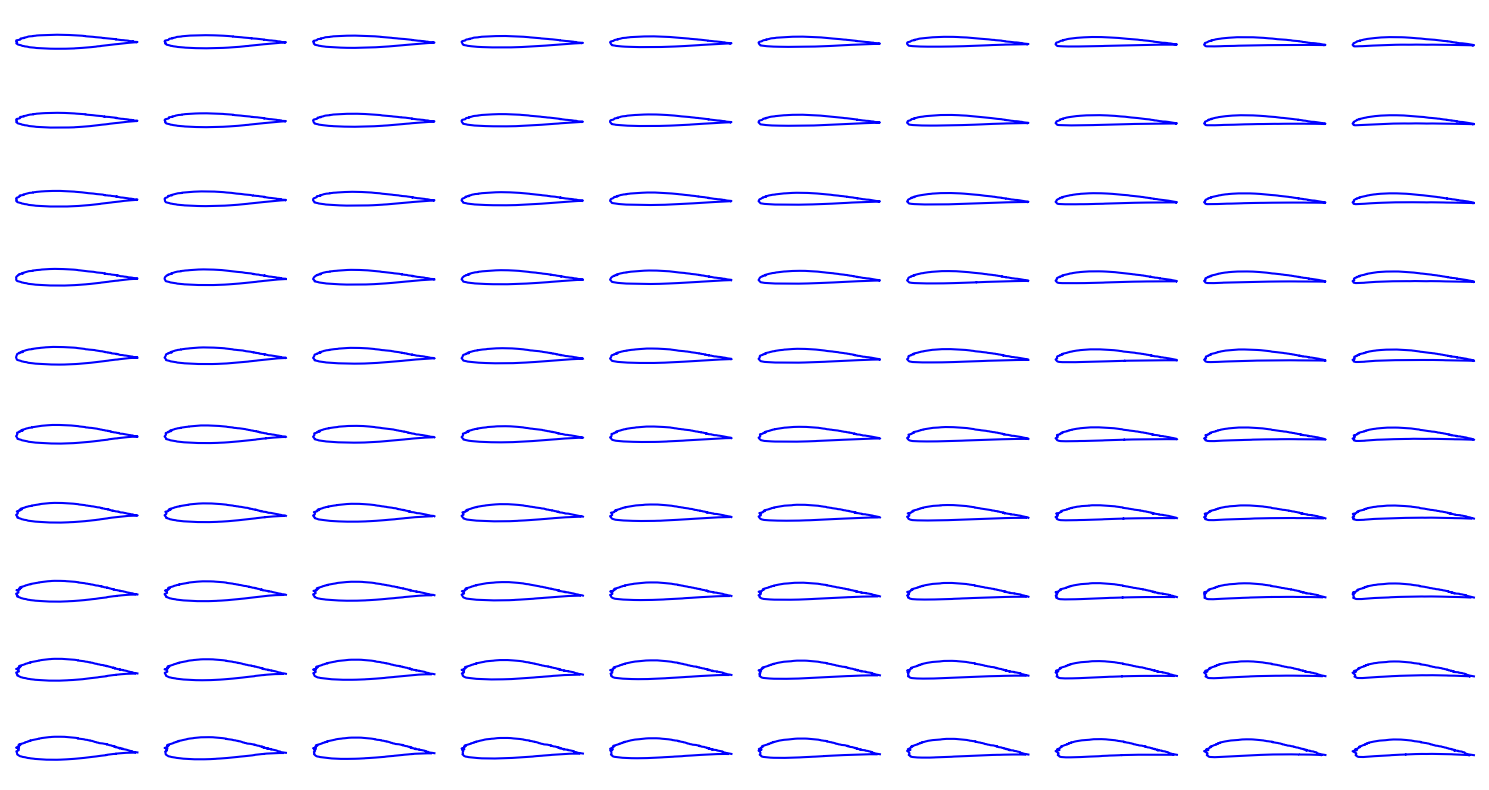

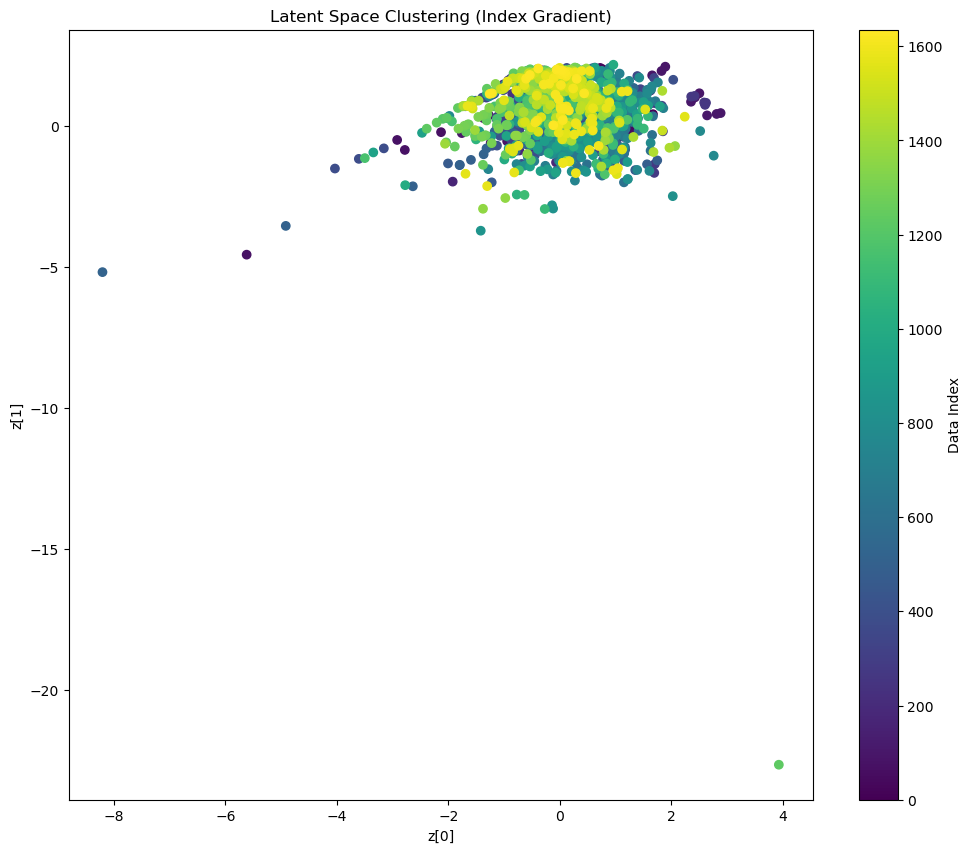

In [5]:
# -----------------------
# ハイパーパラメータ
# -----------------------
DATA_PATH = "airfoils_resampled.npy"
MODEL_DIR = "vae_models"
BATCH_SIZE = 32
EPOCHS = 30
LATENT_DIM = 2         # 潜在次元（調整する）
N_POINTS = 200
N_CHANNELS = 2         # x,y
LEARNING_RATE = 1e-3


# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# 必要ならyチャンネルのスケール調整
# スケール調整なしだとxが主成分となり、yの変動が小さくなるため、yのスケールを調整
y_std = np.std(airfoil_data[:,:,1])
if y_std > 0:
    airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std

# 学習
vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)


# デコーダ再構築値に標準偏差かけてyのスケール戻し
def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            coords_decoded[:, 1] = coords_decoded[:, 1] * y_std

            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()



def plot_label_clusters(vae, data):
    # display a 2D plot of the airfoil latent space, colored by data index (gradient)
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    idx = np.arange(len(z_mean))
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=idx, cmap='viridis')
    plt.colorbar(scatter, label='Data Index')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering (Index Gradient)")
    plt.show()


# grid plot
plot_latent_space_airfoil(vae)

# scatter plot
plot_label_clusters(vae, airfoil_data)
